In [18]:
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
#import the expected awards
expected_df = pd.read_csv('Expected_Rewards.csv')
wheel = 'March_Wheel'
expected_df = expected_df[['Award',wheel]].dropna()
expected_df=expected_df[expected_df.Award!='Total']
expected_df

,Award,March_Wheel
1,2 spins,0.067899
4,Lg_purch,0.060000
5,Purch,0.060000
6,Bal,0.070000
7,100 sats,0.080000
9,0.25%,0.080000
10,0.5%,0.080000
11,0.75%,0.120000
12,1%,0.140000
13,1.5%,0.120000


In [24]:
#inputs

#create no_spin as the default or the last spin to judge on respins
no_spin = .01 #enter the award if you don't spin 

bitcoin_price = 38770 #current bitcoin price
largest_purch_7_days = 350 #input your largest purchase in the last 7 days
largest_purch_7_days = 2*largest_purch_7_days
purch_30_days = 2000 #cumluative purchases over the last 30 days
balance = 4134 #current card balance

have_3 = True # make True if you have already won 3% award this wheel
have_4 = False #make True if you have already won 4% award this wheel
limits = {'Lg_Purch':5000,'Purch':1000,'Bal':1000} #these are awards that are limited
non_percents = {'2 spins':0,'Lg_Purch':largest_purch_7_days,'Purch':purch_30_days,'100 sats':100,'Bal':1000,'2 spins':0}
if have_3 and have_4:
    percents = {'0.25%':.0025,'0.5%':.005,'0.75%':.0075,'1%':.01,'1.5%':.015,'2%':.02,'3%':.0,'4%':.0}
elif have_3 == False and have_4 == False:
    percents = {'0.25%':.0025,'0.5%':.005,'0.75%':.0075,'1%':.01,'1.5%':.015,'2%':.02,'3%':.04,'4%':.03}
elif have_3 == True and have_4 == False:
    percents = {'0.25%':.0025,'0.5%':.005,'0.75%':.0075,'1%':.01,'1.5%':.015,'2%':.02,'3%':.0,'4%':.03}
elif have_3 == False and have_4 == True:
    percents = {'0.25%':.0025,'0.5%':.005,'0.75%':.0075,'1%':.01,'1.5%':.015,'2%':.02,'3%':.04,'4%':.0}
times = ['4%','3%'] #these are awards that you can only win a single time in a wheel

In [27]:
#figure out the no spin award for this purchase
purch_amount = 22.
no_spin_award = no_spin*100000000*purch_amount/bitcoin_price
no_spin_award

567.4490585504255

Given Balance = $4134, Largest Purchase in last 7 days = $700, and total 30 day purchase of $2000


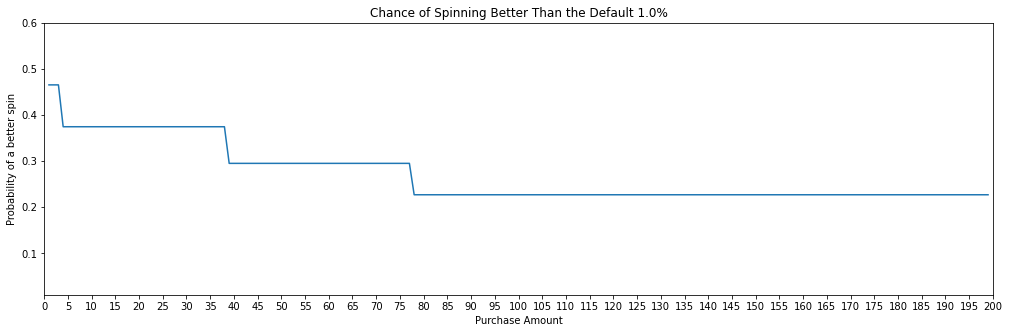

In [26]:
awards = expected_df.Award.tolist()
x=[]
y=[]
max = 200
for purch_amount in range(1,max,1): 
    x.append(purch_amount)
    no_spin_award = no_spin*100000000*purch_amount/bitcoin_price
#     print(no_spin_award)
    above = []
    for award in awards:
        if award in non_percents:
            if non_percents.get(award)>no_spin_award:
                above.append(award)
        if award in percents:
            if percents.get(award)*100000000*purch_amount/bitcoin_price > no_spin_award:
                above.append(award)
    
#     print(above)
    over_df = expected_df[expected_df.Award.isin(above)]
    chance_over = over_df[wheel].sum() 
    chance_spins = expected_df[expected_df.Award=='2 spins'][wheel].tolist()[0]
    chance_over = chance_over + 2*chance_spins*chance_over
    y.append(chance_over)
#     print(f'For ${purch_amount}, the no spin amount is {round(no_spin_award,0)}sats and the chance of spinning better than that is {round(100*chance_over,1)}%')

print(f'Given Balance = ${balance}, Largest Purchase in last 7 days = ${largest_purch_7_days}, and total 30 day purchase of ${purch_30_days}')
plt.figure(figsize = (17,5))
plt.title(f'Chance of Spinning Better Than the Default {100*no_spin}%')
plt.ylim(.01,.6)
plt.xlim(0,max)
plt.ylabel('Probability of a better spin')
plt.xlabel('Purchase Amount')
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,
           115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200])
plt.plot(x,y);